# Kriging the short dataset

In [1]:
from importlib import reload
try:
    reload(kriging)
    from kriging import Kriging
except:
    import kriging
    reload(kriging)
    from kriging import Kriging
import numpy as np
import matplotlib.pyplot as plt

In [2]:
freqarr, freqstep = np.linspace(0,250,4096,retstep=True) # Based on number of frequency channels of the antenna
minfreq = 30
maxfreq = 200
minfreqarg = int(minfreq/freqstep)
maxfreqarg = int(maxfreq/freqstep)

In [3]:
# Load in the data
datadir = '../test_data/2021/100MHz/NS/'

save_mask = np.load(datadir+'shortdata_2021_100MHz_NS_mask.npy')
dat=np.load(datadir+'shortdata_meas_2021_100MHz_NS.npy')[save_mask]
# lst=np.load(datadir+'shortlst_2021_100MHz_NS.npy')[save_mask]
t=np.load(datadir+'shortsystime_2021_100MHz_NS.npy')[save_mask]
t_ant = np.load(datadir+'antsystime_2021_100MHz_NS.npy')

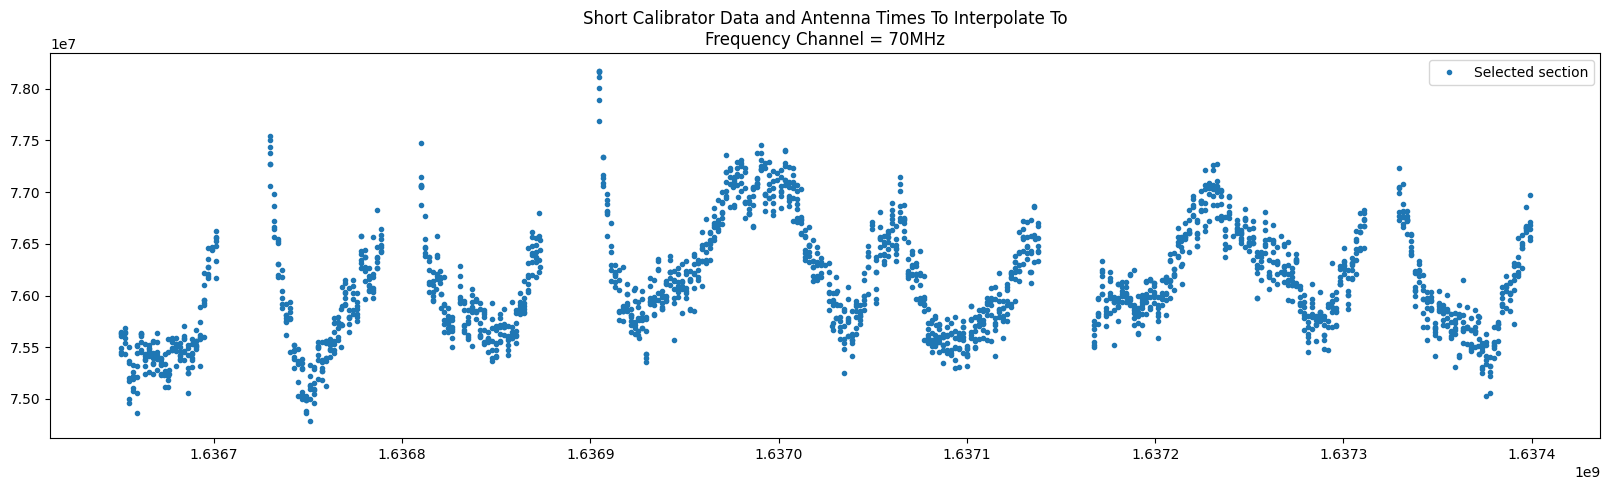

In [4]:
# Optional: select a subset of the data (mostly for testing)
tmax=1.6374e9
tmin=1.6365e9

mask=(t>tmin)&(t<tmax)
tt=t[mask]
dd=dat[mask,:]

ant_mask = (t_ant>tmin)&(t_ant<tmax)
tt_ant = t_ant[ant_mask]

# Pick a freq_index to plot (the fit is done for all frequencies)
freq = 70 # MHz
freq_index = int(freq/freqstep)

plt.figure(figsize=(20,5))
plt.plot(tt,dd[:,freq_index],'.',label='Selected section')
# plt.plot(tt_ant,[7.6e7 for ti in tt_ant],'.',color='red',label='Antenna times (interp times)')
plt.title('Short Calibrator Data and Antenna Times To Interpolate To\nFrequency Channel = '+str(freq)+'MHz')
plt.legend()
plt.show()

In [8]:
# Step 1: Initialize Kriging class
# You can actually pass tmax and tmin to the Kriging object and it'll select for you
krig_object = Kriging(systime=t,data=dat,interp_times=t_ant,tmax_mask=tmax,tmin_mask=tmin)

In [ ]:
# Step 2: Call the object to perform the Kriging
krig_object(dt=5,dtmax=10*3600,acf_functype='polyfit') # dt and dtmax in seconds

In [18]:
rslt = krig_object.interp_data[0]
err = krig_object.interp_std[0]

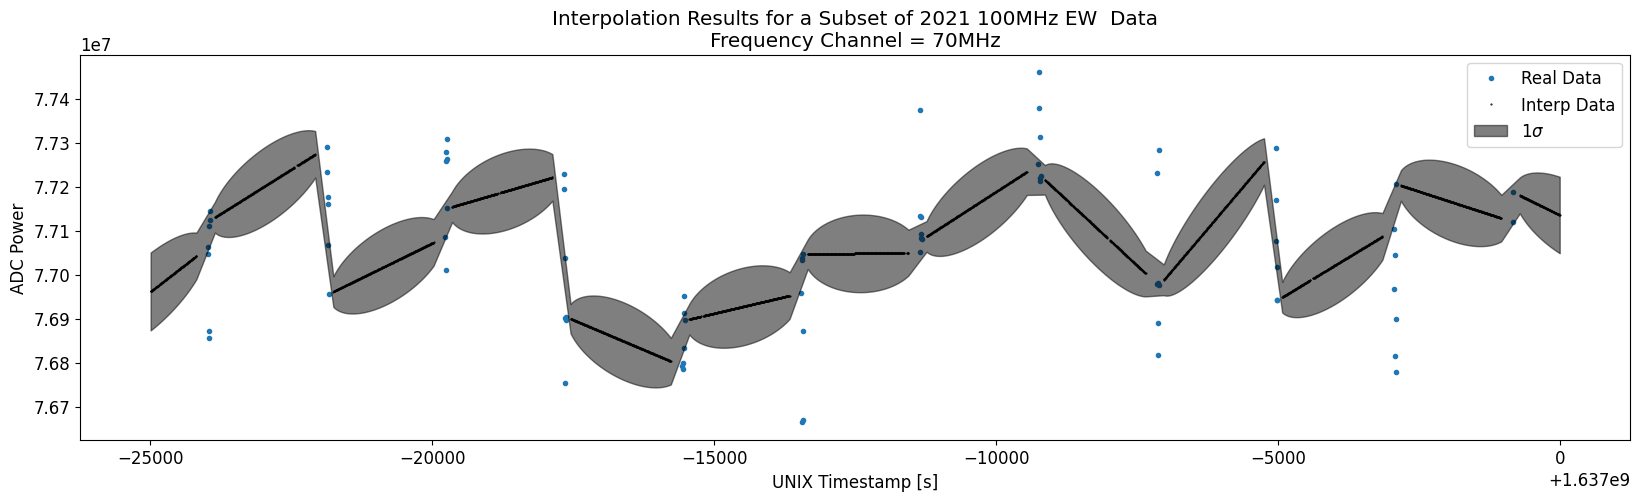

In [67]:
freq = 70 # MHz
freq_index = int(freq/freqstep)

fig = plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size': 12})

# tplotmin = 1.636905e9 # for Emilie plot
# tplotmax = 1.6371e9 # for Emilie plot
tplotmin = 1.636975e9
tplotmax = 1.637e9
plt.plot(tt[(tt>tplotmin)&(tt<tplotmax)],dd[:,freq_index][(tt>tplotmin)&(tt<tplotmax)],'.',label='Real Data',zorder=1)
# plt.plot(tt,dd[:,freq_index],'.',label='Real data')
# plt.errorbar(x=tt_ant,y=rslt,yerr=err,label='Interp Data',marker='.',ms=1,capsize=1,alpha=0.1)
plt.plot(tt_ant[(tt_ant>tplotmin)&(tt_ant<tplotmax)],rslt[(tt_ant>tplotmin)&(tt_ant<tplotmax)],'.',label='Interp Data',color='k',alpha=1,ms=1,zorder=2)
plt.fill_between(tt_ant[(tt_ant>tplotmin)&(tt_ant<tplotmax)],(rslt-err)[(tt_ant>tplotmin)&(tt_ant<tplotmax)],(rslt+err)[(tt_ant>tplotmin)&(tt_ant<tplotmax)],alpha=0.5,label=r'1$\sigma$',color='k',zorder=3)

# plt.plot(tt_ant,rslt,'.',ms=1,label='Interp Data')
# plt.fill_between(tt_ant,(rslt-err),(rslt+err),alpha=0.2)

# plt.ylim(bottom= 7.3e7)
plt.xlabel('UNIX Timestamp [s]')
plt.ylabel('ADC Power')
plt.legend()
plt.title('Interpolation Results for a Subset of 2021 100MHz EW  Data\nFrequency Channel = '+str(freq)+'MHz')
# plt.savefig('InterpRslt_Zoomed',dpi=300)
plt.show()